## Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV ,Lasso, LassoCV, ElasticNet, ElasticNetCV

%matplotlib inline

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv('../datasets/train_df.csv', index_col=0, keep_default_na=False, 
                       dtype={'MS SubClass': np.object, 
                              'Id' : np.object, 
                              'PID': np.object})
test_df = pd.read_csv('../datasets/test_df.csv', index_col=0, keep_default_na=False, 
                      dtype={'MS SubClass': np.object, 
                             'Id' : np.object, 
                             'PID': np.object})

In [3]:
train_df.shape

(2049, 81)

In [4]:
test_df.shape

(879, 80)

In [5]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [6]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NA,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NA,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2049 non-null   object 
 1   PID              2049 non-null   object 
 2   MS SubClass      2049 non-null   object 
 3   MS Zoning        2049 non-null   object 
 4   Lot Frontage     2049 non-null   object 
 5   Lot Area         2049 non-null   int64  
 6   Street           2049 non-null   object 
 7   Alley            2049 non-null   object 
 8   Lot Shape        2049 non-null   object 
 9   Land Contour     2049 non-null   object 
 10  Utilities        2049 non-null   object 
 11  Lot Config       2049 non-null   object 
 12  Land Slope       2049 non-null   object 
 13  Neighborhood     2049 non-null   object 
 14  Condition 1      2049 non-null   object 
 15  Condition 2      2049 non-null   object 
 16  Bldg Type        2049 non-null   object 
 17  House Style   

## Get dummies for categorical variables

In [8]:
draft_categorical = train_df.select_dtypes(include=['object'])
draft_categorical.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Alley,Lot Shape,Land Contour,Utilities,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,109,533352170,60,RL,,Pave,NA,IR1,Lvl,AllPub,...,Attchd,1976.0,RFn,TA,TA,Y,NA,NA,NA,WD
1,544,531379050,60,RL,43.0,Pave,NA,IR1,Lvl,AllPub,...,Attchd,1997.0,RFn,TA,TA,Y,NA,NA,NA,WD
2,153,535304180,20,RL,68.0,Pave,NA,Reg,Lvl,AllPub,...,Detchd,1953.0,Unf,TA,TA,Y,NA,NA,NA,WD
3,318,916386060,60,RL,73.0,Pave,NA,Reg,Lvl,AllPub,...,BuiltIn,2007.0,Fin,TA,TA,Y,NA,NA,NA,WD
4,255,906425045,50,RL,82.0,Pave,NA,IR1,Lvl,AllPub,...,Detchd,1957.0,Unf,TA,TA,N,NA,NA,NA,WD


In [9]:
num_to_cat = train_df.loc[:,['Id','Overall Qual', 'Overall Cond', 'Garage Cars', 'Year Built', 'Year Remod/Add', 
                           'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                           'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 
                           'Yr Sold', 'SalePrice']]

In [10]:
categorical = draft_categorical.drop(['PID'], axis=1)

In [11]:
categorical = pd.merge(draft_categorical, num_to_cat, on='Id')

In [12]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2049 non-null   object
 1   PID              2049 non-null   object
 2   MS SubClass      2049 non-null   object
 3   MS Zoning        2049 non-null   object
 4   Lot Frontage     2049 non-null   object
 5   Street           2049 non-null   object
 6   Alley            2049 non-null   object
 7   Lot Shape        2049 non-null   object
 8   Land Contour     2049 non-null   object
 9   Utilities        2049 non-null   object
 10  Lot Config       2049 non-null   object
 11  Land Slope       2049 non-null   object
 12  Neighborhood     2049 non-null   object
 13  Condition 1      2049 non-null   object
 14  Condition 2      2049 non-null   object
 15  Bldg Type        2049 non-null   object
 16  House Style      2049 non-null   object
 17  Roof Style       2049 non-null   

In [69]:
#categorical = pd.get_dummies(categorical)

In [70]:
categorical.head()

,Overall Qual,Overall Cond,Garage Cars,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,...,Garage Yr Blt_y_2002.0,Garage Yr Blt_y_2003.0,Garage Yr Blt_y_2004.0,Garage Yr Blt_y_2005.0,Garage Yr Blt_y_2006.0,Garage Yr Blt_y_2007.0,Garage Yr Blt_y_2008.0,Garage Yr Blt_y_2009.0,Garage Yr Blt_y_2010.0,Garage Yr Blt_y_2207.0
0,6,8,2,1976,2005,0,0,2,1,3,...,0,0,0,0,0,0,0,0,0,0
1,7,5,2,1996,1997,1,0,2,1,4,...,0,0,0,0,0,0,0,0,0,0
2,5,7,1,1953,2007,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
3,5,5,2,2006,2007,0,0,2,1,3,...,0,0,0,0,0,1,0,0,0,0
4,6,8,2,1900,1993,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0


In [71]:
corr = categorical.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice            1.000000
Overall Qual         0.800028
Garage Cars          0.648007
Bsmt Qual_Ex         0.586529
Year Built           0.571726
                       ...   
Garage Finish_Unf   -0.432043
Bsmt Qual_TA        -0.458068
Fireplace Qu_NA     -0.485483
Kitchen Qual_TA     -0.540939
Exter Qual_TA       -0.600160
Name: SalePrice, Length: 5095, dtype: float64


Running the first Linear Regression model with only those that have shown greater than 0.5 correlation to target 'SalesPrice'

In [17]:
X = train_df[['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']]
y = train_df['SalePrice']

In [18]:
X.shape

(2049, 4)

In [19]:
y.shape

(2049,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape

(1536, 4)

In [21]:
ss = StandardScaler()

In [22]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [23]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)

In [24]:
lr.scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lr.scores

array([0.70274018, 0.53912219, 0.72968287, 0.73385211, 0.72643131])

In [25]:
lr.scores.mean()

0.6863657321655141

In [26]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_scores

array([0.70267169, 0.54120341, 0.72608093, 0.73728897, 0.7260784 ])

In [27]:
lasso_scores.mean()

0.6866646812358546

In [28]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [29]:
lasso.score(X_train_sc, y_train)

0.7023076372355189

In [30]:
lasso.score(X_test_sc, y_test)

0.5812283304699661

In [64]:
X = train_df[['Gr Liv Area', 'Garage Area', 'Total Bsmt SF']]
y = train_df['SalePrice']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [62]:
ss = StandardScaler()

In [63]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

ValueError: could not convert string to float: 'RL'

In [58]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)

In [36]:
lr.scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lr.scores

array([0.76985033, 0.76921126, 0.70602047, 0.62055795, 0.7245419 ])

In [37]:
lr.scores.mean()

0.7180363835716455

In [38]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_scores

array([0.76988226, 0.76902436, 0.70596677, 0.62086623, 0.72457311])

In [39]:
lasso_scores.mean()

0.718062544694521

In [40]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [41]:
lasso.score(X_train_sc, y_train)

0.7319623115666479

In [42]:
lasso.score(X_test_sc, y_test)

0.47679127035846774

In [43]:
reg = LassoCV()
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 90495.839146
Best score using built in LassoCV: 0.670551


In [44]:
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

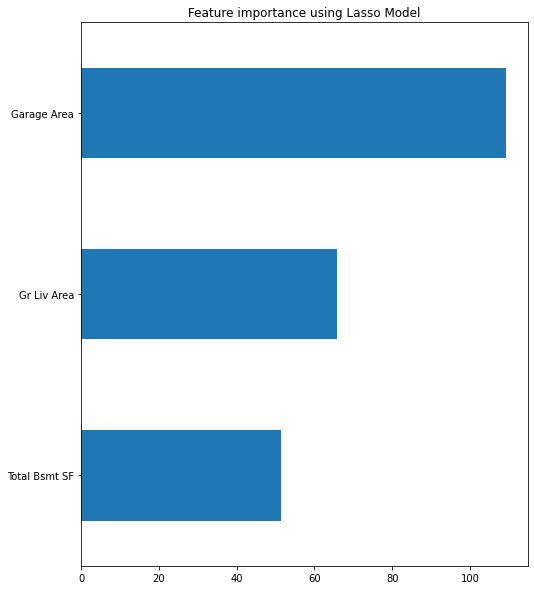

In [45]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [46]:
y_pred = lasso.predict(X_test_sc)

In [47]:
test_df = pd.read_csv('../datasets/test_df.csv')

In [48]:
X_test = test_df[['Gr Liv Area', 'Garage Area', 'Total Bsmt SF']]

In [49]:
predictions = lasso.predict(X_test)

In [50]:
print(predictions)

[1.05210504e+08 1.36533339e+08 7.94660339e+07 7.12501307e+07
 9.89123815e+07 5.95105414e+07 6.92423914e+07 8.55931425e+07
 9.44752431e+07 8.84194232e+07 8.70952359e+07 7.25456626e+07
 9.61958255e+07 1.46981923e+08 9.27052400e+07 5.17826006e+07
 9.21685417e+07 7.50426315e+07 1.07776986e+08 9.54570028e+07
 7.27922479e+07 6.98047573e+07 1.13045130e+08 7.23080866e+07
 8.90345383e+07 6.20560820e+07 8.84210955e+07 8.39650702e+07
 7.33158323e+07 3.40067262e+07 6.84461330e+07 7.53919192e+07
 1.44843653e+08 8.36513747e+07 1.07033283e+08 7.74022414e+07
 9.37815020e+07 4.41654553e+07 4.31826418e+07 9.83527108e+07
 7.09119993e+07 1.00993672e+08 8.93546225e+07 8.21765944e+07
 1.05645490e+08 6.24165046e+07 1.00849185e+08 6.34670159e+07
 6.57169990e+07 7.23009676e+07 7.28301978e+07 1.01452801e+08
 1.20040253e+08 7.63862590e+07 5.97041461e+07 7.41063093e+07
 9.75592559e+07 8.59726060e+07 8.55376993e+07 1.10360414e+08
 1.45615195e+08 8.50890359e+07 8.02934163e+07 9.11704873e+07
 8.74226172e+07 1.462860

In [51]:
my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})
my_submission.to_csv('../datasets/submission.csv', index=False)

In [52]:
len(predictions)

879

In [53]:
predictions.shape

(879,)